In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tools.label_extract import read_extracted_labels, labels_to_df, labels_to_simple_df, df_labels_to_point_list
from defs.storage_locs import extracted_image_path, extracted_label_path
from court_segment.plot_court_labels import plot_labels
from tools.visualization import plot_image

In [3]:
sample_img = cv2.imread(extracted_image_path('center_left_1', 0))

sample_labels = read_extracted_labels(extracted_label_path('center_left_1'))
labels_df = labels_to_df(sample_labels)



In [4]:
sample_labels

{'metadata': {'task': {'id': '352624',
   'name': 'center_left_1',
   'size': '230',
   'mode': 'interpolation',
   'overlap': '5',
   'bugtracker': None,
   'created': '2023-10-30 19:36:54.862281+00:00',
   'updated': '2023-11-06 05:52:47.075615+00:00',
   'subset': 'default',
   'start_frame': '0',
   'stop_frame': '2290',
   'frame_filter': 'step=10',
   'segments': '\n        ',
   'owner': '\n        ',
   'assignee': None,
   'labels': '\n        ',
   'original_size': '\n        ',
   'source': 'center_left_1.MOV'},
  'dumped': '2023-11-06 06:05:07.664147+00:00'},
 'frames': {'10': {'1': {'label': 1,
    'keyframe': '1',
    'outside': 0,
    'occluded': 0,
    'points': [366.38, 530.21]},
   '2': {'label': 2,
    'keyframe': '1',
    'outside': 0,
    'occluded': 0,
    'points': [722.3, 466.97]},
   '3': {'label': 3,
    'keyframe': '1',
    'outside': 0,
    'occluded': 0,
    'points': [928.37, 428.34]},
   '4': {'label': 4,
    'keyframe': '1',
    'outside': 0,
    'occlud

In [5]:
sample_np = labels_to_simple_df(sample_labels)
a = df_labels_to_point_list(sample_np)

In [6]:
sample_np

,1_x,1_y,1_occluded,1_outside,2_x,2_y,2_occluded,2_outside,3_x,3_y,...,8_outside,9_x,9_y,9_occluded,9_outside,10_x,10_y,10_occluded,10_outside,frame_num
10,366.38,530.21,0,0,722.3,466.97,0,0,928.37,428.34,...,0,1176.19,702.76,0,0,1615.99,389.98,0,0,10
20,361.33,520.39,0,0,722.07,457.42,0,0,928.46,418.78,...,0,1174.8,688.49,0,0,1615.22,379.81,0,0,20
30,362.37,509.25,0,0,722.07,445.87,0,0,928.46,407.23,...,0,1176.66,675.08,0,0,1617.8,370.32,0,0,30
40,367.41,499.56,0,0,723.35,437.73,0,0,932.31,399.52,...,0,1181.13,665.52,0,0,1623.8,363.33,0,0,40
50,377.47,493.14,0,0,729.08,433.89,0,0,939.93,396.69,...,0,1184.31,663.55,0,0,1634.34,363.36,0,0,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
970,338.69,512.66,0,0,718.8,430.5,0,0,931.4,382.75,...,0,1581.09,825.85,0,0,1685.93,342.47,0,0,970
980,338.69,499.17,0,0,721.04,415.51,0,0,932.9,368.51,...,0,1577.85,808.58,0,0,1687.43,328.23,0,0,980
990,340.49,487.48,0,0,721.05,405.62,0,0,933.66,358.89,...,0,1582.17,794.55,0,0,1692.63,315.74,0,0,990
1000,343.19,483.89,0,0,724.64,403.82,0,0,937.17,356.88,...,0,1595.12,771.25,0,0,1696.52,311.85,0,0,1000


In [7]:
a.loc['0'].values

array([list([371.05, 537.8]), list([723.12, 474.66]),
       list([931.49, 436.29]), list([736.02, 738.72]),
       list([1125.52, 566.41]), list([1304.52, 485.98]),
       list([1210.59, 993.12]), list([1591.53, 523.56]),
       list([1177.67, 705.55]), list([1615.04, 402.09])], dtype=object)

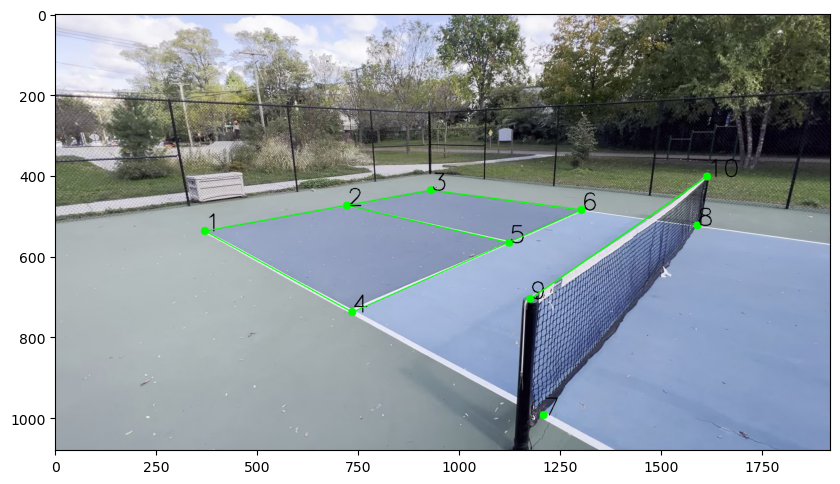

In [8]:
plot_image(plot_labels(sample_img, a.loc['0'].values, withLines=True), color_transform=True)

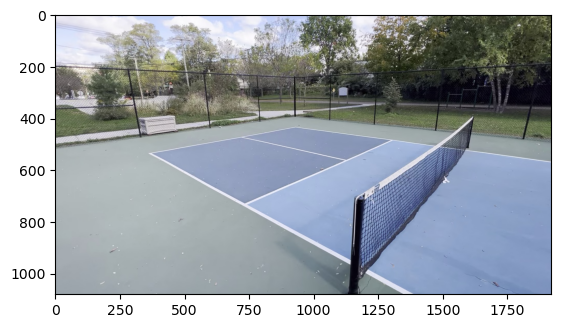

In [16]:
# sample_img has cv2 color format, need to convert to RGB for plt
plt.imshow(cv2.cvtColor(sample_img, cv2.COLOR_BGR2RGB))

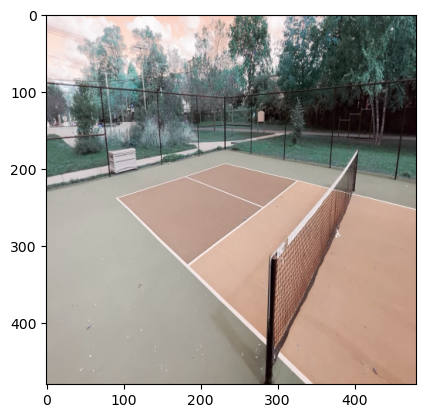

In [17]:
plt.imshow(cv2.resize(sample_img, (480, 480), interpolation=cv2.INTER_AREA))

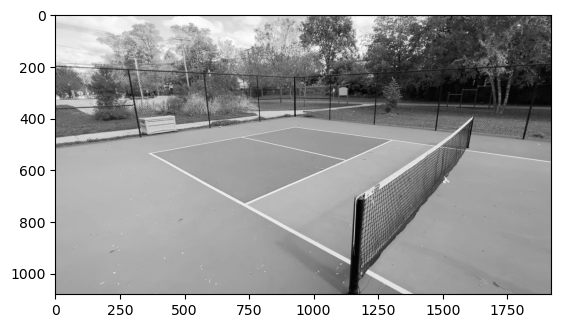

In [18]:
# view in grayscale
plt.imshow(cv2.cvtColor(sample_img, cv2.COLOR_BGR2GRAY), cmap='gray')